<a href="https://colab.research.google.com/github/jisusP/Articulo/blob/main/Coeficiente_de_Coseno.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install rdkit 
!pip install sklearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 29.4/29.4 MB 30.8 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


In [2]:
from rdkit import Chem
from rdkit.Chem import AllChem
from sklearn.metrics.pairwise import cosine_similarity
import plotly.figure_factory as ff

In [11]:
smiles = [
    "CCC1=CC=C2N=C(C=CC2=C1)C1=NC=CC=C1",
    "ClC1=CC=C2N=C(C=CC2=C1)C1=CN=CC=C1",
    "FC1=CC=C2N=C(C=CC2=C1)C1=CN=CC=C1",
    "C1=CC=C2N=C(C=CC2=C1)C1=CC=NC=C1",
    "CC1=CC=C2N=C(C=CC2=C1)C1=CC=NC=C1",
    "ClC1=CC=C2N=C(C=CC2=C1)C1=CC=NC=C1",
    "ClC1=C2N=C(C=CC2=CC=C1)C1=CC=NC=C1",
    "FC1=CC=C2N=C(\\C=C\\C3=NC=CC=C3)C=CC2=C1",
    "C(=C/C1=NC2=CC=CC=C2C=C1)\\C1=CN=CC=C1",
    "ClC1=CC=C2N=C(\\C=C\\C3=CN=CC=C3)C=CC2=C1",
    "C(=C/C1=NC2=CC=CC=C2C=C1)\\C1=CC=NC=C1",
    "ClC1=CC=C2N=C(\C=C\C3=CC=NC=C3)C=CC2=C1 "
]

In [12]:
mols = [Chem.MolFromSmiles(smile) for smile in smiles]

In [13]:
fps = [AllChem.GetMorganFingerprintAsBitVect(mol, 2, nBits=1024) for mol in mols]

In [14]:
similarity_matrix = cosine_similarity(fps)

In [15]:
print(similarity_matrix)

[[1.         0.5        0.5        0.50518149 0.53452248 0.50111483
  0.33407655 0.53125    0.34925035 0.38301617 0.36748421 0.375     ]
 [0.5        1.         0.8125     0.57735027 0.60133779 0.80178373
  0.53452248 0.40625    0.47625048 0.70710678 0.36748421 0.59375   ]
 [0.5        0.8125     1.         0.57735027 0.60133779 0.60133779
  0.46770717 0.59375    0.47625048 0.53033009 0.36748421 0.40625   ]
 [0.50518149 0.57735027 0.57735027 1.         0.73294091 0.73294091
  0.69436507 0.39692831 0.54992668 0.3742276  0.65578924 0.4330127 ]
 [0.53452248 0.60133779 0.60133779 0.73294091 1.         0.78571429
  0.57142857 0.40089186 0.33942212 0.40946151 0.42857143 0.50111483]
 [0.50111483 0.80178373 0.60133779 0.73294091 0.78571429 1.
  0.64285714 0.40089186 0.33942212 0.59844375 0.42857143 0.70156076]
 [0.33407655 0.53452248 0.46770717 0.69436507 0.57142857 0.64285714
  1.         0.26726124 0.33942212 0.34646743 0.42857143 0.40089186]
 [0.53125    0.40625    0.59375    0.39692831 0.4

In [27]:
"Distancia"
distance_matrix = 1 - similarity_matrix
lab = ["6","7","8","9","10","11","12","13","14","15","16","17"]
fig = ff.create_dendrogram(distance_matrix, labels= lab)
fig.update_layout(width=800, height=500, title = "Dendrograma de la distancia (Coeficiente de coseno)", title_x=0.5)
fig.show()

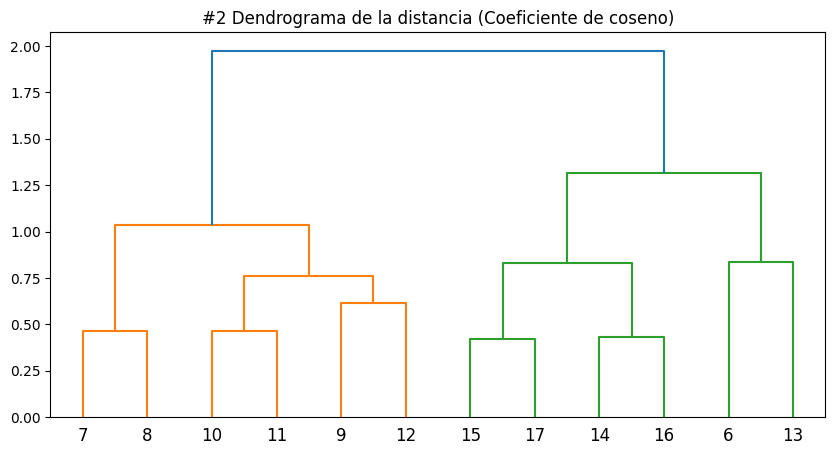

In [30]:
"2da forma"
import scipy.cluster.hierarchy as shc
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
plt.title("#2 Dendrograma de la distancia (Coeficiente de coseno)")
d = shc.dendrogram(shc.linkage(distance_matrix, method = "ward"), labels = lab)